In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [17]:
df_clients = pd.read_csv("../Data/Raw/df_final_experiment_clients.txt")
df_demo = pd.read_csv("../Data/Raw/df_final_demo.txt")
df_web1 = pd.read_csv("../Data/Raw/df_final_web_data_pt_1.txt")
df_web2 = pd.read_csv("../Data/Raw/df_final_web_data_pt_2.txt")

df_demo_control = pd.read_csv("../Data/Clean/demo_control.csv")

In [19]:
df_demo_control.nunique().sort_values(ascending=False)

Unnamed: 0          23532
client_id           23532
bal                 23489
clnt_tenure_mnth      443
clnt_age              155
clnt_tenure_yr         52
calls_6_mnth            7
logons_6_mnth           7
num_accts               6
gendr                   3
Variation               1
dtype: int64

In [21]:
#check for missing values
df_demo_control.isnull().sum().sort_values(ascending=False)

clnt_age            6
clnt_tenure_yr      5
clnt_tenure_mnth    5
gendr               5
num_accts           5
bal                 5
calls_6_mnth        5
logons_6_mnth       5
Unnamed: 0          0
client_id           0
Variation           0
dtype: int64

In [23]:
#see rows with missing values
df_demo_control[df_demo_control.isnull().any(axis=1)]

,Unnamed: 0,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
1937,4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
3802,8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
4383,9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0,Control
13188,28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
16444,35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
21525,46076,8611797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control


In [28]:
#drop rows missing values
df_cleaned = df_demo_control.dropna()

## Client Tenure ##

In [53]:
disp_tenure_months = df_cleaned['clnt_tenure_mnth'].describe()
disp_tenure_years = df_cleaned['clnt_tenure_yr'].describe()
mode_tenure_years = df_cleaned['clnt_tenure_yr'].mode()[0]
mode_tenure_months = df_cleaned['clnt_tenure_mnth'].mode()[0]

disp_tenure_months, disp_tenure_years, mode_tenure_years, mode_tenure_months

(count    23526.000000
 mean       151.062102
 std         82.127663
 min         33.000000
 25%         82.000000
 50%        137.000000
 75%        192.000000
 max        669.000000
 Name: clnt_tenure_mnth, dtype: float64,
 count    23526.000000
 mean        12.087860
 std          6.877626
 min          2.000000
 25%          6.000000
 50%         11.000000
 75%         16.000000
 max         55.000000
 Name: clnt_tenure_yr, dtype: float64,
 6.0,
 58.0)

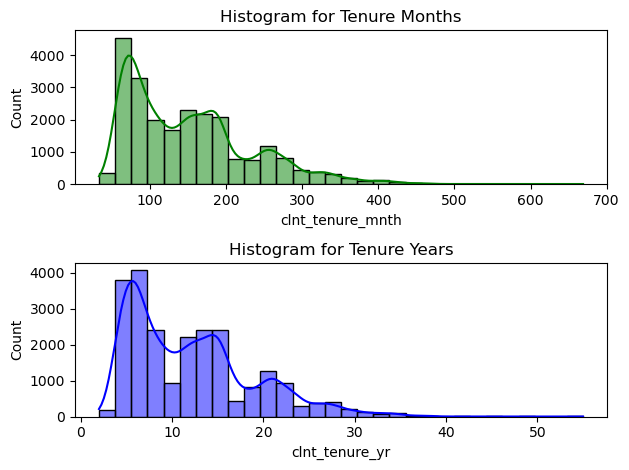

In [57]:
fig, axes = plt.subplots(2,1, dpi = 100)
sns.histplot(df_cleaned['clnt_tenure_mnth'], kde=True, bins=30, color="green", ax=axes[0])
axes[0].set_title("Histogram for Tenure Months")
sns.histplot(df_cleaned['clnt_tenure_yr'], kde=True, bins=30, color="blue", ax=axes[1])
axes[1].set_title("Histogram for Tenure Years")
plt.tight_layout()
plt.show()

**Analysis:** 75% of Vanguard's account holders are long-term (6+ years), with 25% of clients holding accounts for 16+ years.
There are few new clients included in this dataset, unclear if that was intentional for the control group?